In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("D:/Airplane/data/DELAYED_midway.csv", index_col=0)
df.head()

In [ ]:
df.columns

In [17]:
df.shape

(10434420, 33)

In [18]:
arr_delay_mean = df['ARR_DELAY'].mean()
arr_delay_median = df['ARR_DELAY'].median()

print(f"ARR_DELAY Mean: {arr_delay_mean}")
print(f"ARR_DELAY Median: {arr_delay_median}")

ARR_DELAY Mean: 3.27697207894641
ARR_DELAY Median: -7.0


In [19]:
arr_delay_std = df['ARR_DELAY'].std()
arr_delay_mad = df['ARR_DELAY'].mad()

print(f"ARR_DELAY Standard Deviation: {arr_delay_std:.2f} minutes")
print(f"ARR_DELAY Mean Absolute Deviation: {arr_delay_mad:.2f} minutes")

ARR_DELAY Standard Deviation: 50.98 minutes
ARR_DELAY Mean Absolute Deviation: 23.56 minutes


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13076\34936121.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  arr_delay_mad = df['ARR_DELAY'].mad()


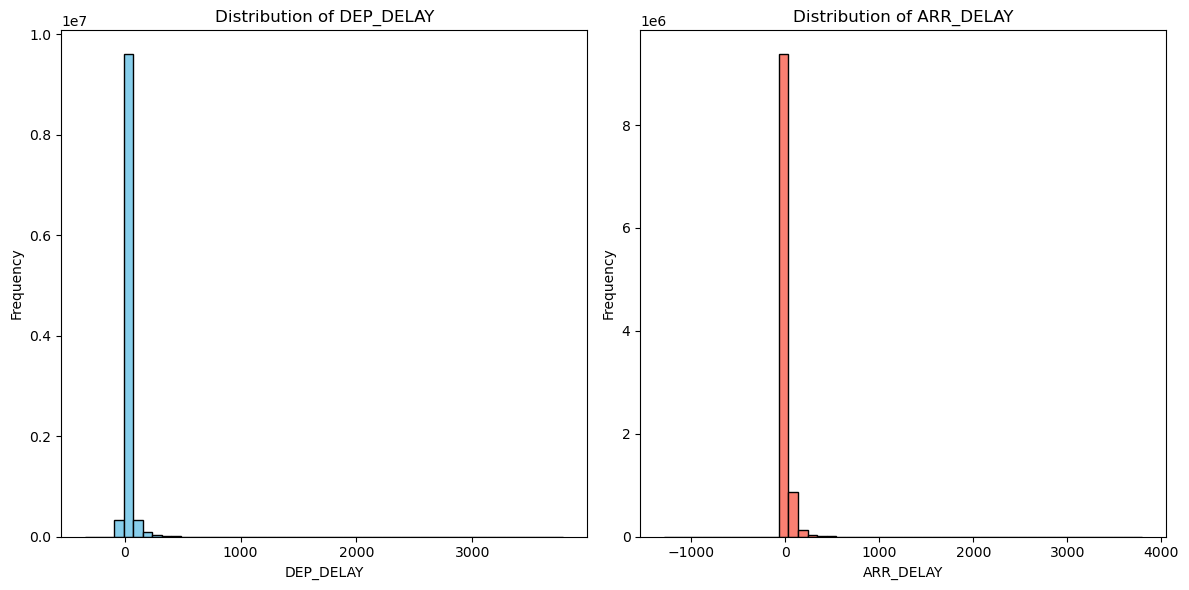

DEP_DELAY Outliers:
0           118.0
1            25.0
2            50.0
6           280.0
13           25.0
            ...  
10640204     22.0
10640205     77.0
10640206     59.0
10640209     72.0
10640210     38.0
Name: DEP_DELAY, Length: 1444783, dtype: float64

ARR_DELAY Outliers:
0           110.0
6           281.0
18          219.0
21           43.0
32          152.0
            ...  
10640196     72.0
10640202    133.0
10640205     61.0
10640206     40.0
10640209     48.0
Name: ARR_DELAY, Length: 913981, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

dep_delay = df['DEP_DELAY']
arr_delay = df['ARR_DELAY']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dep_delay, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('DEP_DELAY')
plt.ylabel('Frequency')
plt.title('Distribution of DEP_DELAY')

plt.subplot(1, 2, 2)
plt.hist(arr_delay, bins=50, color='salmon', edgecolor='black')
plt.xlabel('ARR_DELAY')
plt.ylabel('Frequency')
plt.title('Distribution of ARR_DELAY')

plt.tight_layout()
plt.show()

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

dep_delay_outliers = find_outliers_iqr(dep_delay)
arr_delay_outliers = find_outliers_iqr(arr_delay)

print("DEP_DELAY Outliers:")
print(dep_delay_outliers)

print("\nARR_DELAY Outliers:")
print(arr_delay_outliers)

In [3]:
def find_outlier_indices(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].index

dep_delay_outlier_indices = find_outlier_indices(df['DEP_DELAY'])
arr_delay_outlier_indices = find_outlier_indices(df['ARR_DELAY'])

outlier_indices = dep_delay_outlier_indices.union(arr_delay_outlier_indices)

df1 = df.drop(index=outlier_indices)

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df1.shape[0]}")

Original dataset size: 10434420
Cleaned dataset size: 8900842


In [3]:
df1.shape

(8900842, 33)

In [10]:
output_path = "D:/Airplane/data/DELAYED_final.csv"
df1.to_csv(output_path, index=True)

print(f"符合极端天气条件的数据已保存至 {output_path}")

符合极端天气条件的数据已保存至 D:/Airplane/data/DELAYED_final.csv


In [5]:
arr_delay_mean = df1['ARR_DELAY'].mean()
arr_delay_median = df1['ARR_DELAY'].median()

print(f"ARR_DELAY Mean: {arr_delay_mean}")
print(f"ARR_DELAY Median: {arr_delay_median}")

ARR_DELAY Mean: -8.72135332814581
ARR_DELAY Median: -10.0


In [6]:
arr_delay_std = df1['ARR_DELAY'].std()
arr_delay_mad = df1['ARR_DELAY'].mad()

print(f"ARR_DELAY Standard Deviation: {arr_delay_std:.2f} minutes")
print(f"ARR_DELAY Mean Absolute Deviation: {arr_delay_mad:.2f} minutes")

ARR_DELAY Standard Deviation: 13.59 minutes
ARR_DELAY Mean Absolute Deviation: 10.56 minutes


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15824\172956241.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  arr_delay_mad = df1['ARR_DELAY'].mad()


In [26]:
df1.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'ARR_DELAY', 'DEP_DELAY',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME'],
      dtype='object')

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

os.chdir(r"D:/Airplane/data")
alldata = df1
sampled_data = alldata.sample(frac=0.1, random_state=1)

y = sampled_data['ARR_DELAY'] 
X = sampled_data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

numeric_features = X_train.select_dtypes(exclude='object').columns
categorical_features = X_train.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' 
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed = csr_matrix(X_train_preprocessed)
X_test_preprocessed = csr_matrix(X_test_preprocessed)

regressor = XGBRegressor(n_estimators=50, max_depth=2, learning_rate=0.1, 
                         objective='reg:squarederror', verbosity=0)

regressor.fit(X_train_preprocessed, y_train, eval_set=[(X_test_preprocessed, y_test)], verbose=True)

y_pred = regressor.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

param_grid = {'n_estimators': list(range(10, 100, 10)), 'max_depth': [2, 4, 6]}
gs = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, objective='reg:squarederror', verbosity=0),
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=KFold(n_splits=2, random_state=1, shuffle=True))

gs.fit(X_train_preprocessed, y_train)
print("Best parameters found: ", gs.best_params_)
print("Best MSE score: ", -gs.best_score_)

best_model = XGBRegressor(**gs.best_params_, learning_rate=0.1, objective='reg:squarederror', verbosity=0)
best_model.fit(X_train_preprocessed, y_train)

y_pred_best = best_model.predict(X_test_preprocessed)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best Mean Squared Error with optimal parameters: {best_mse:.3f}")
print(f"Best R-squared with optimal parameters: {best_r2:.3f}")

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = csr_matrix(X_preprocessed)
cv_scores = cross_val_score(gs, X_preprocessed, y, scoring='neg_mean_squared_error', 
                            cv=KFold(n_splits=3, random_state=1, shuffle=True))
print('Cross-Validation MSE Score: %.3f +/- %.3f' % (-np.mean(cv_scores), np.std(cv_scores)))

[0]	validation_0-rmse:13.55806
[1]	validation_0-rmse:13.54059
[2]	validation_0-rmse:13.52583
[3]	validation_0-rmse:13.51292
[4]	validation_0-rmse:13.50238
[5]	validation_0-rmse:13.49117
[6]	validation_0-rmse:13.48040
[7]	validation_0-rmse:13.46866
[8]	validation_0-rmse:13.45997
[9]	validation_0-rmse:13.45239
[10]	validation_0-rmse:13.44559
[11]	validation_0-rmse:13.43764
[12]	validation_0-rmse:13.43112
[13]	validation_0-rmse:13.42515
[14]	validation_0-rmse:13.41974
[15]	validation_0-rmse:13.41343
[16]	validation_0-rmse:13.40829
[17]	validation_0-rmse:13.40357
[18]	validation_0-rmse:13.39435
[19]	validation_0-rmse:13.38819
[20]	validation_0-rmse:13.38381
[21]	validation_0-rmse:13.37870
[22]	validation_0-rmse:13.37452
[23]	validation_0-rmse:13.37037
[24]	validation_0-rmse:13.36623
[25]	validation_0-rmse:13.36103
[26]	validation_0-rmse:13.35752
[27]	validation_0-rmse:13.35410
[28]	validation_0-rmse:13.35101
[29]	validation_0-rmse:13.34781
[30]	validation_0-rmse:13.34419
[31]	validation_0-

In [6]:
df1.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'ARR_DELAY', 'DEP_DELAY',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME'],
      dtype='object')

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix

os.chdir(r"D:/Airplane/data")
alldata = df1

y_full = alldata['ARR_DELAY']  
X_full = alldata[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME']]

X_full_preprocessed = preprocessor.transform(X_full)
X_full_preprocessed = csr_matrix(X_full_preprocessed)  

best_model = XGBRegressor(n_estimators=90, max_depth=6, learning_rate=0.1, 
                          objective='reg:squarederror', verbosity=0)
best_model.fit(X_full_preprocessed, y_full)

y_full_pred = best_model.predict(X_full_preprocessed)

mse = mean_squared_error(y_full, y_full_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_full, y_full_pred)
r2 = r2_score(y_full, y_full_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 168.293
Root Mean Squared Error (RMSE): 12.973
Mean Absolute Error (MAE): 10.081
R-squared (R²): 0.089


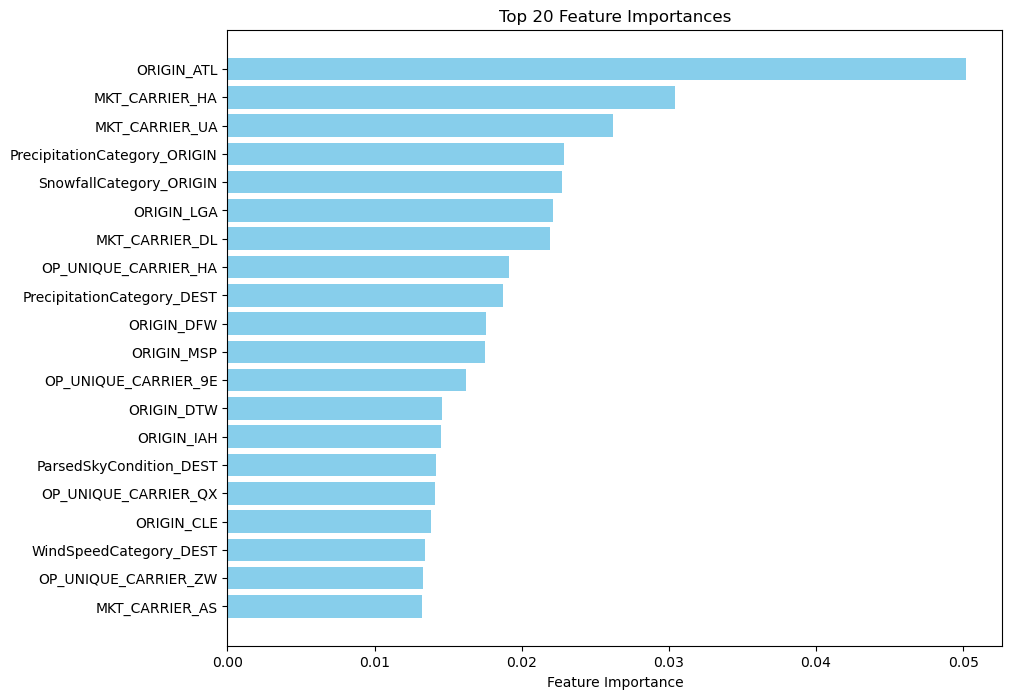

In [8]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_model.feature_importances_

encoded_categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([encoded_categorical_features, numeric_features])

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

top_features = feature_importance_df.nlargest(20, 'Importance')

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()


                                      Feature  Importance
61                            cat__ORIGIN_ATL    0.050161
6                         cat__MKT_CARRIER_HA    0.030412
8                         cat__MKT_CARRIER_UA    0.026227
3691  remainder__PrecipitationCategory_ORIGIN    0.022844
3689       remainder__SnowfallCategory_ORIGIN    0.022730
246                           cat__ORIGIN_LGA    0.022152
3                         cat__MKT_CARRIER_DL    0.021925
24                  cat__OP_UNIQUE_CARRIER_HA    0.019142
3692    remainder__PrecipitationCategory_DEST    0.018719
136                           cat__ORIGIN_DFW    0.017574
284                           cat__ORIGIN_MSP    0.017497
11                  cat__OP_UNIQUE_CARRIER_9E    0.016217
144                           cat__ORIGIN_DTW    0.014577
209                           cat__ORIGIN_IAH    0.014497
3678       remainder__ParsedSkyCondition_DEST    0.014163
31                  cat__OP_UNIQUE_CARRIER_QX    0.014093
112           

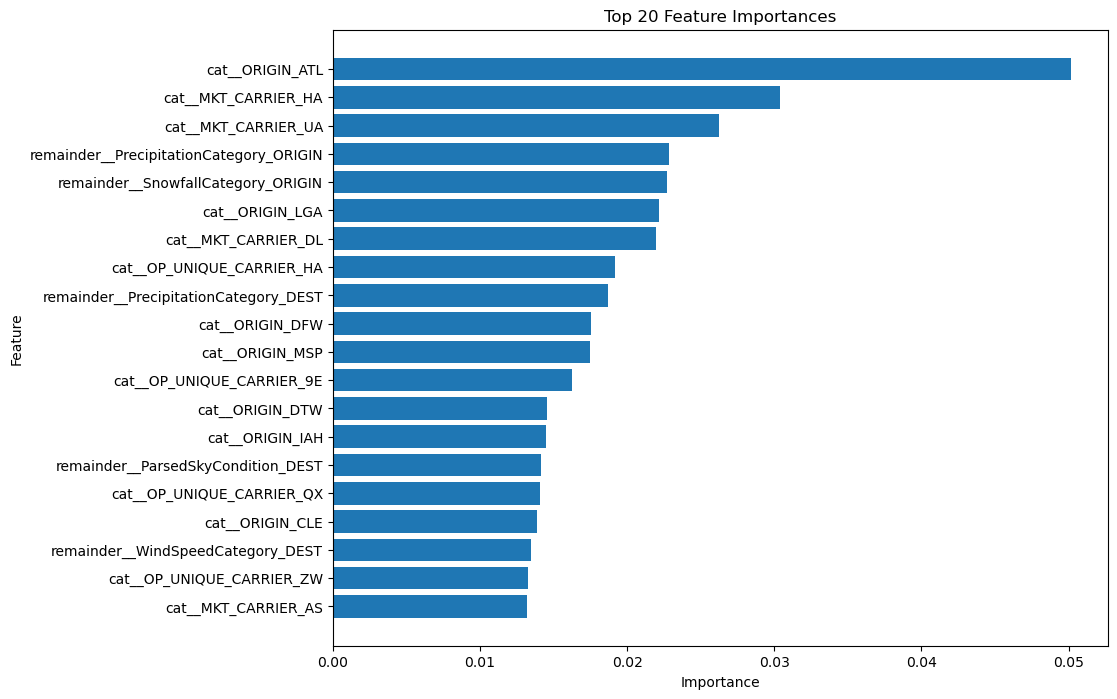

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = preprocessor.get_feature_names_out()
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

print(importance_df)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

In [19]:
import pickle

with open('xgb_model_delay.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)  

In [2]:
import pickle

with open('xgb_model_delayed.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [2]:
df1 = pd.read_csv("D:/Airplane/data/DELAYED_final.csv", index_col=0)
df1.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,DEST,DISTANCE,EXTREME_ORIGIN,EXTREME_DEST,...,SnowDepthCategory_ORIGIN,SnowDepthCategory_DEST,SnowfallCategory_ORIGIN,SnowfallCategory_DEST,PrecipitationCategory_ORIGIN,PrecipitationCategory_DEST,ARR_DELAY,DEP_DELAY,Timechange_CRS_DEP_Time,Timechange_CRS_ARR_TIME
3,1,3,3,DL,DL,ATL,ABE,692.0,0,1,...,0,0,0,0,0,0,-12.0,-3.0,20:30,22:37
4,1,3,3,DL,EV,ATL,ABE,692.0,0,0,...,0,0,0,0,0,0,15.0,7.0,09:15,11:19
5,1,4,4,DL,DL,ATL,ABE,692.0,0,1,...,0,0,0,5,0,0,1.0,-1.0,20:30,22:37
7,1,5,5,DL,DL,ATL,ABE,692.0,0,1,...,0,3,0,0,0,0,-6.0,-4.0,20:30,22:37
8,1,5,5,DL,EV,ATL,ABE,692.0,1,1,...,0,3,0,0,0,0,-1.0,19.0,09:15,11:19


In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"D:/Airplane/data")
alldata = df1
sampled_data = alldata.sample(frac=0.1, random_state=1)

y = sampled_data['ARR_DELAY'] 
X = sampled_data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

numeric_features = X_train.select_dtypes(exclude='object').columns
categorical_features = X_train.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' 
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed = csr_matrix(X_train_preprocessed)
X_test_preprocessed = csr_matrix(X_test_preprocessed)

In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix

os.chdir(r"D:/Airplane/data")
alldata = df1

y_full = alldata['ARR_DELAY']  
X_full = alldata[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST',
       'Timechange_CRS_DEP_Time', 'Timechange_CRS_ARR_TIME']]

numeric_features = X_full.select_dtypes(exclude='object').columns
categorical_features = X_full.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_full_preprocessed = preprocessor.fit_transform(X_full)
X_full_preprocessed = csr_matrix(X_full_preprocessed) 

best_model = XGBRegressor(n_estimators=90, max_depth=6, learning_rate=0.1, 
                          objective='reg:squarederror', verbosity=0)
best_model.fit(X_full_preprocessed, y_full)

y_full_pred = best_model.predict(X_full_preprocessed)

mse = mean_squared_error(y_full, y_full_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_full, y_full_pred)
r2 = r2_score(y_full, y_full_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 168.293
Root Mean Squared Error (RMSE): 12.973
Mean Absolute Error (MAE): 10.081
R-squared (R²): 0.089


In [17]:
import joblib

joblib.dump(preprocessor, 'preprocessor_delayed.pkl') 

['preprocessor_delayed.pkl']

In [1]:
import joblib
preprocessor = joblib.load('preprocessor_delayed.pkl')  

In [4]:
import numpy as np
import pandas as pd

new_data = pd.DataFrame({'MONTH': 1, 'DAY_OF_MONTH': 3, 'DAY_OF_WEEK': 3, 'MKT_CARRIER': 'DL', 
                         'OP_UNIQUE_CARRIER': 'DL', 'ORIGIN': 'ATL', 'DEST': 'ABE', 'DISTANCE': 692.0, 
                         'EXTREME_ORIGIN': np.nan, 'EXTREME_DEST': np.nan, 'Days_after_Thanksgiving': 41, 
                         'Days_after_Christmas': 9, 'Days_after_New_Year': 2, 'ParsedSkyCondition_ORIGIN': np.nan, 
                         'ParsedSkyCondition_DEST': np.nan, 'HumidityCategory_ORIGIN': np.nan, 'HumidityCategory_DEST': np.nan, 
                         'PressureCategory_ORIGIN': np.nan, 'PressureCategory_DEST':np.nan, 'WetBulbTempCategory_ORIGIN': np.nan, 
                         'WetBulbTempCategory_DEST': np.nan, 'WindSpeedCategory_ORIGIN': np.nan, 'WindSpeedCategory_DEST': np.nan, 
                         'SnowDepthCategory_ORIGIN': np.nan, 'SnowDepthCategory_DEST': np.nan, 'SnowfallCategory_ORIGIN': np.nan, 
                         'SnowfallCategory_DEST': np.nan, 'PrecipitationCategory_ORIGIN': np.nan, 'PrecipitationCategory_DEST': np.nan,
                         'Timechange_CRS_DEP_Time': '20:30', 'Timechange_CRS_ARR_TIME': '22:37'},index = [0])

new_data_preprocessed = preprocessor.transform(new_data)

y_pred = loaded_model.predict(new_data_preprocessed)

new_data['Predicted_Delay_Time'] = y_pred

print(new_data[['Predicted_Delay_Time']].head())

   Predicted_Delay_Time
0              -7.30155
